In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df1 = pd.read_csv('problem1.csv')
df1.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1


1-1 EDA(탐색적 데이터 분석)을 하시오
(시각화와 통계량을 제시할 것)

In [36]:
df1.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
X_Maximum,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
Minimum_of_Luminosity,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


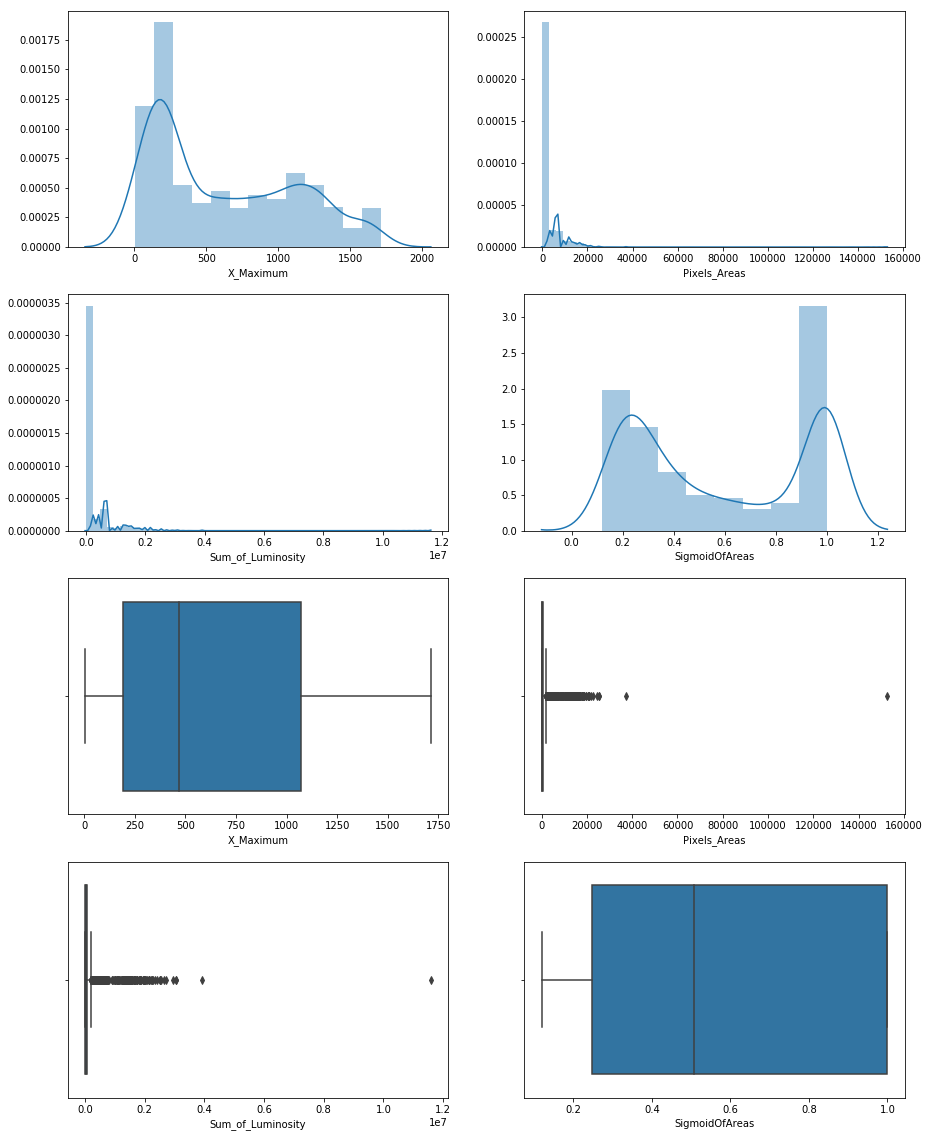

In [4]:
features = ['X_Maximum', 'Pixels_Areas', 'Sum_of_Luminosity', 'SigmoidOfAreas']
plt.figure(figsize=(15, 20))
for i, feature in enumerate(features, start=1):
    plt.subplot(4, 2, i)
    sns.distplot(df1[feature])
    plt.subplot(4, 2, i+4)
    sns.boxplot(df1[feature])
plt.show()

1-2 변수 선택(VIF), 파생변수 생성, 데이터 분할(train/test(20%))
(시각화와 통계량을 제시할 것)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    vif_df = pd.DataFrame()
    vif_df["Feature"] = df.columns
    vif_df["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_df

numeric_cols = df1.select_dtypes(include=np.number).drop('target',axis=1).columns
calc_vif(df1[numeric_cols])

,Feature,VIF
0,X_Minimum,4.207249e+04
1,X_Maximum,3.841371e+04
2,Y_Minimum,1.703244e+10
3,Y_Maximum,1.703264e+10
4,Pixels_Areas,4.907086e+02
5,X_Perimeter,1.687822e+02
6,Y_Perimeter,1.559205e+03
7,Sum_of_Luminosity,3.661924e+02
8,Minimum_of_Luminosity,8.324323e+00
9,Maximum_of_Luminosity,6.036402e+00


In [29]:
def feature_selection(df, threshhold):
    features = df.columns.tolist()
    while True:
        vif_df = calc_vif(df[features])
        max_vif = vif_df['VIF'].max()
        if max_vif > threshhold:
            maxloc = vif_df['VIF'].idxmax()
            print(f'{df[features].columns[maxloc]} vif={max_vif:.2f}으로 가장 높아 제거')
            features.pop(maxloc)
        else:
            break
    return features

selected_features = feature_selection(df1[numeric_cols], 10)
print(f'최종 변수: {selected_features}')

Y_Maximum vif=17032637295.75으로 가장 높아 제거
X_Minimum vif=41105.20으로 가장 높아 제거
LogOfAreas vif=1125.20으로 가장 높아 제거
TypeOfSteel_A400 vif=585.27으로 가장 높아 제거
Pixels_Areas vif=453.69으로 가장 높아 제거
Log_X_Index vif=413.45으로 가장 높아 제거
Maximum_of_Luminosity vif=162.17으로 가장 높아 제거
Log_Y_Index vif=136.06으로 가장 높아 제거
X_Perimeter vif=101.39으로 가장 높아 제거
Length_of_Conveyer vif=88.53으로 가장 높아 제거
Edges_Y_Index vif=58.84으로 가장 높아 제거
Minimum_of_Luminosity vif=26.11으로 가장 높아 제거
Empty_Index vif=12.14으로 가장 높아 제거
Edges_X_Index vif=11.04으로 가장 높아 제거
최종 변수: ['X_Maximum', 'Y_Minimum', 'Y_Perimeter', 'Sum_of_Luminosity', 'TypeOfSteel_A300', 'Steel_Plate_Thickness', 'Edges_Index', 'Square_Index', 'Outside_X_Index', 'Outside_Global_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']


In [33]:
from sklearn.model_selection import train_test_split

object_cols = df1.select_dtypes(include='object').columns
X = pd.concat([df1[selected_features], df1[object_cols]], axis=1)
X = pd.get_dummies(data=X, columns=object_cols, drop_first=True)
y = df1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
X_Maximum,1552.0,6.115432e+02,4.973871e+02,4.0000,191.00000,4.555000e+02,1.066000e+03,1.713000e+03
Y_Minimum,1552.0,1.670356e+06,1.791054e+06,6712.0000,482115.75000,1.220084e+06,2.201911e+06,1.298766e+07
Y_Perimeter,1552.0,8.717719e+01,4.740405e+02,1.0000,14.00000,2.600000e+01,8.525000e+01,1.815200e+04
Sum_of_Luminosity,1552.0,2.138358e+05,5.390024e+05,250.0000,10019.00000,1.991800e+04,8.635275e+04,1.159141e+07
TypeOfSteel_A300,1552.0,4.046392e-01,4.909803e-01,0.0000,0.00000,0.000000e+00,1.000000e+00,1.000000e+00
Steel_Plate_Thickness,1552.0,7.921456e+01,5.579192e+01,40.0000,40.00000,7.000000e+01,8.000000e+01,3.000000e+02
Edges_Index,1552.0,3.282865e-01,3.007340e-01,0.0000,0.06040,2.210500e-01,5.654750e-01,9.952000e-01
Square_Index,1552.0,5.688271e-01,2.702211e-01,0.0083,0.36000,5.500000e-01,8.182000e-01,1.000000e+00
Outside_X_Index,1552.0,3.398621e-02,6.004563e-02,0.0015,0.00660,1.020000e-02,2.362500e-02,8.759000e-01
Outside_Global_Index,1552.0,5.837629e-01,4.811809e-01,0.0000,0.00000,1.000000e+00,1.000000e+00,1.000000e+00


#### 1-3 종속변수들중 "1"인지 아닌지 판단하려한다. 종속변수를 1과 1이 아닌 값(이항)으로 치환하고 로지스틱 회귀 분석을 실시하라.
#### confusionMatrix를 확인하고 최적의 cut off value 정하여라.